In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def ma(X, w=None):
    if(not w): w = len(X)
    avgs = []
    for i in range(len(X)):
        numer = np.sum(X[max(0, i-w+1):i+1])
        den = min(w, i+1)
        avgs.append(numer/den)
    return np.array(avgs)

## First Plot

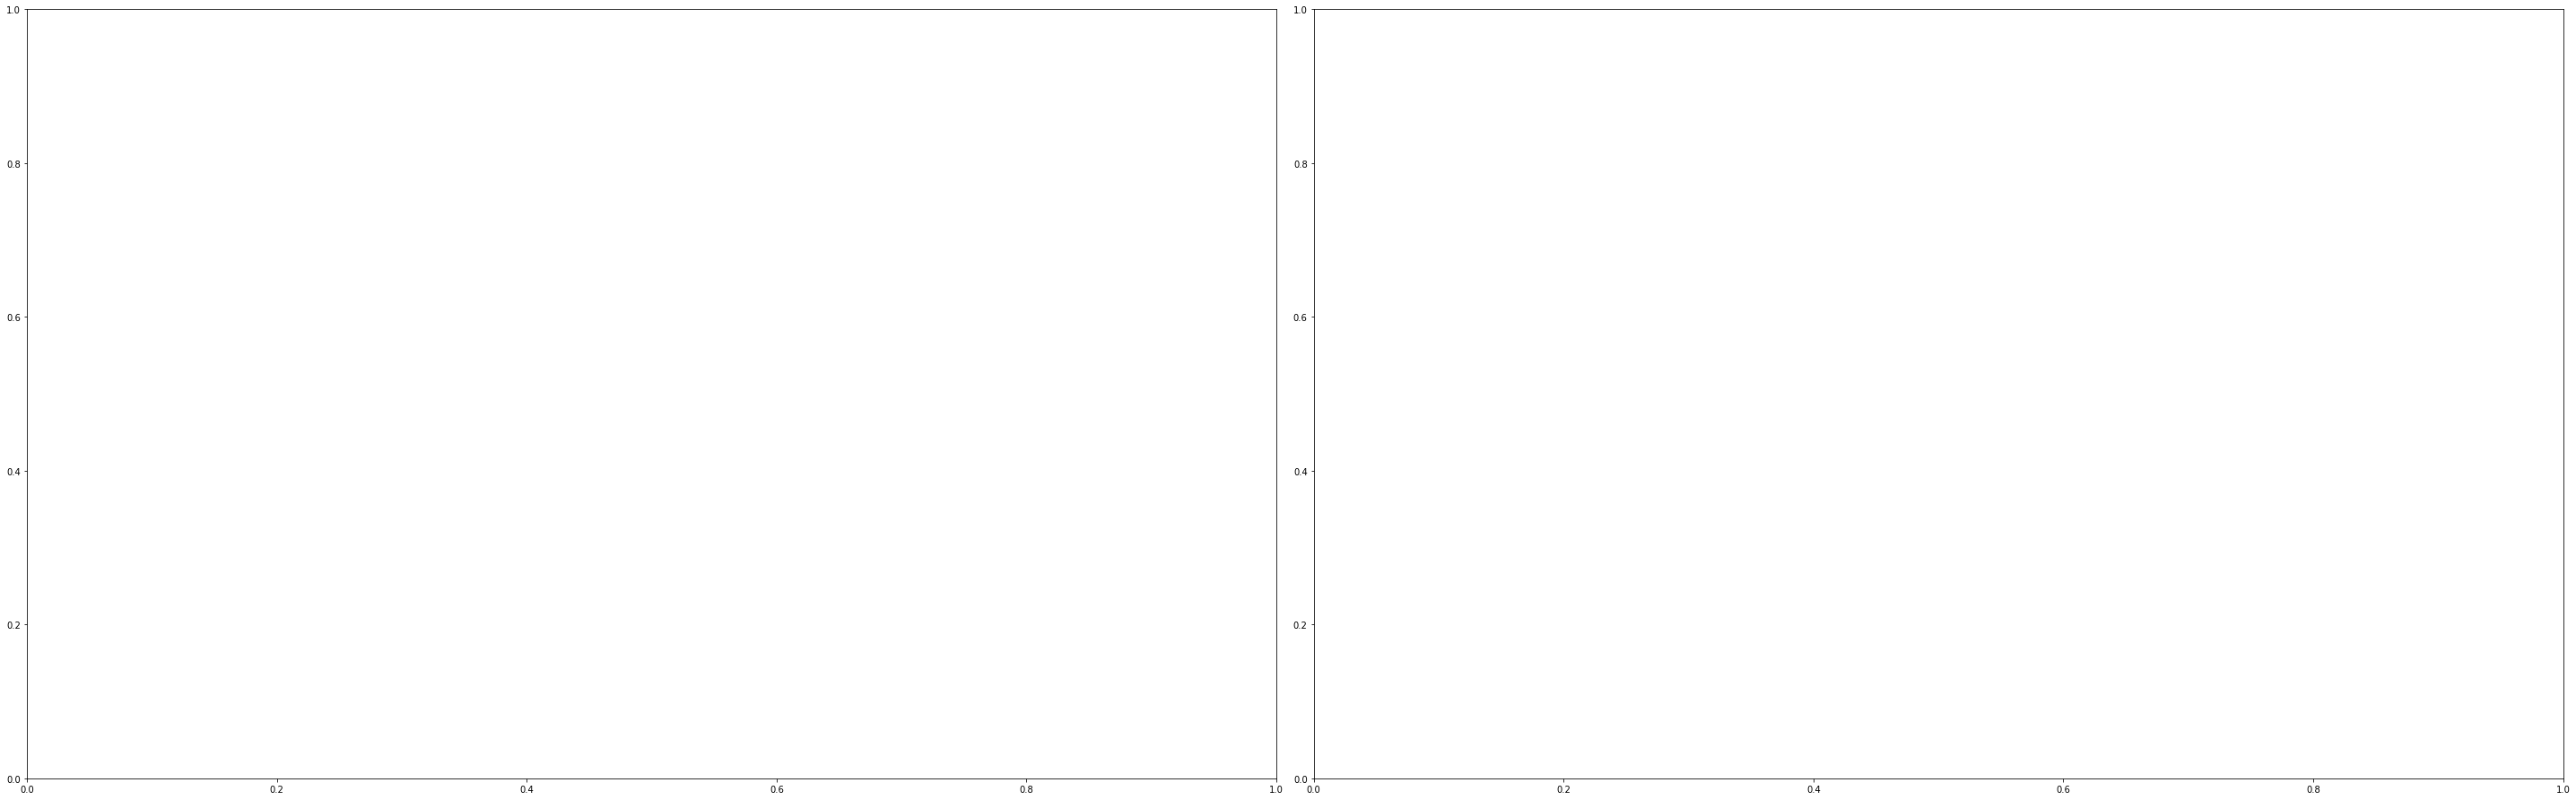

In [4]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(40, 12.5)
fig.tight_layout()

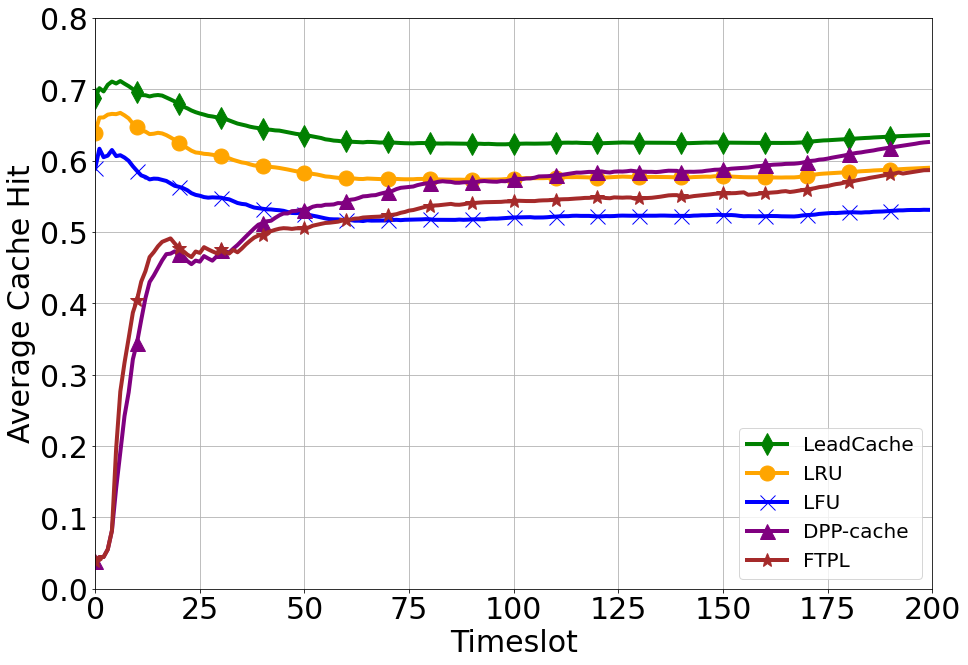

In [8]:
lfu_hits = pd.read_csv("csv_200/LFU_Hits.csv")
lru_hits = pd.read_csv("csv_200/LRU_Hits.csv")
lead_hits = pd.read_csv("csv_200/LeadCache_Hits.csv")
dpp_hits = pd.read_csv("hit_rate.csv")
ftpl_hits = pd.read_csv("hit_rate_ftpl.csv")

plt.figure(figsize=(10*1.5, 7*1.5))
plt.xlabel("Timeslot", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel("Average Cache Hit", fontsize=30)
plt.xlim(left=0, right=200)
plt.ylim(bottom=0, top=0.8)
plt.plot(ma(lead_hits), label="LeadCache", marker='d', markevery=10, markersize=15, c='green', linewidth=4)
plt.plot(ma(lru_hits), label="LRU", marker='o', markevery=10, markersize=15, c='orange', linewidth=4)
plt.plot(ma(lfu_hits), label="LFU", marker='x', markevery=10, markersize=15, c='blue', linewidth=4)
plt.plot(ma(dpp_hits), label="DPP-cache", marker='^', markevery=10, markersize=15, c='purple', linewidth=4)
plt.plot(ma(ftpl_hits), label="FTPL", marker='*', markevery=10, markersize=15, c='brown', linewidth=4)
plt.legend(loc='lower right', prop={'size': 20})
plt.grid()
plt.savefig("cache_hit.pdf", bbox_inches='tight')

## Second Plot

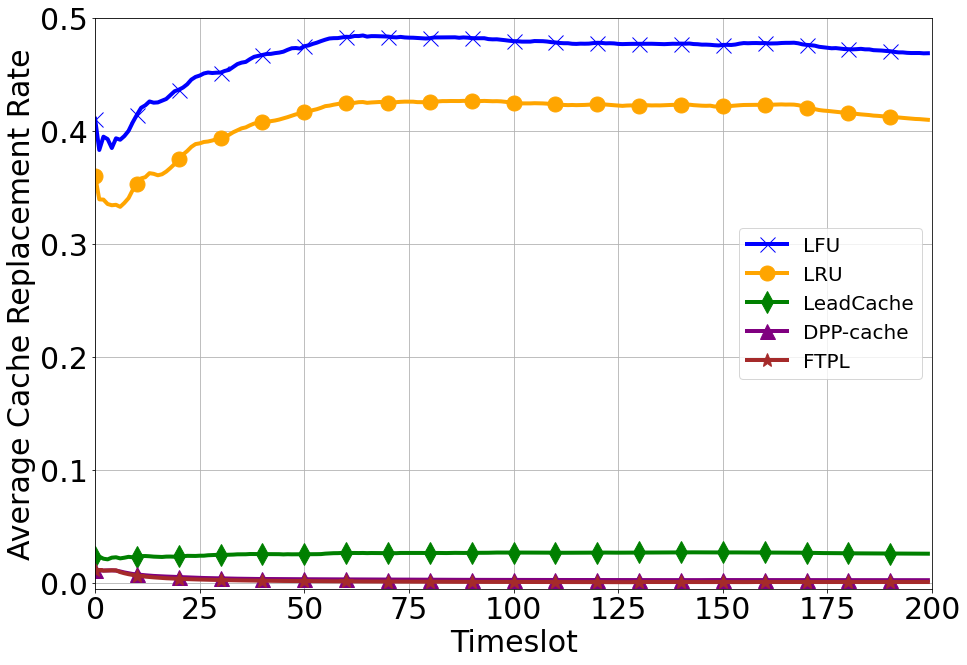

In [6]:
lfu_downloads = pd.read_csv("csv_200/LFU_Downloads.csv")
lru_downloads = pd.read_csv("csv_200/LRU_Downloads.csv")
lead_downloads = pd.read_csv("csv_200/LeadCache_Downloads.csv")
dpp_downloads = pd.read_csv("download_rate.csv")
ftpl_downloads = pd.read_csv("download_rate_ftpl.csv")

plt.figure(figsize=(10*1.5, 7*1.5))
plt.xlabel("Timeslot", fontsize=30)
plt.ylabel("Average Cache Replacement Rate", fontsize=30)
plt.xlim(left=0, right=200)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(bottom=-0.005, top=0.5)
plt.plot(ma(lfu_downloads), label="LFU", marker='x', markevery=10, markersize=15, c='blue', linewidth=4)
plt.plot(ma(lru_downloads), label="LRU", marker='o', markevery=10, markersize=15, c='orange', linewidth=4)
plt.plot(ma(lead_downloads), label="LeadCache", marker='d', markevery=10, markersize=15, c='green', linewidth=4)
plt.plot(ma(dpp_downloads), label="DPP-cache", marker='^', markevery=10, markersize=15, c='purple', linewidth=4)
plt.plot(ma(ftpl_downloads), label="FTPL", marker='*', markevery=10, markersize=15, c='brown', linewidth=4)
plt.legend(loc='center right', prop={'size': 20})
plt.grid()
plt.savefig("cache_replace_rate.pdf", bbox_inches='tight')

In [7]:
fig.tight_layout()
fig.savefig("combine.jpg")